In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime


Missing values in each column:
date              0
precipitation    50
temp_max         70
temp_min         47
wind             52
weather           0
dtype: int64


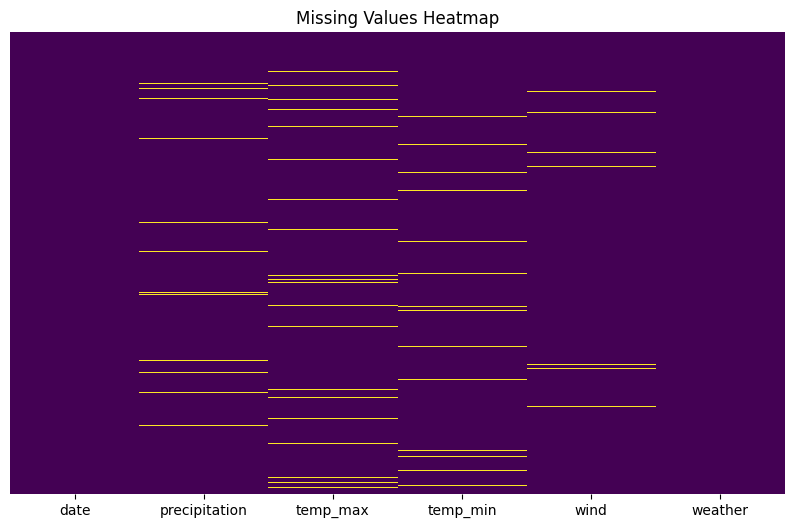

In [2]:
# Exercise 1: Data Loading and Missing Value Detection
# Load the dataset
df = pd.read_csv('WeatherData.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [3]:
# Exercise 2: Interpolate and Verify Missing Values
# Linear interpolation
df_interpolated = df.interpolate(method='linear')

# Verify missing values after interpolation
missing_after = df_interpolated.isnull().sum()
print("\nMissing values after interpolation:")
print(missing_after)

# If any remaining missing values, forward fill
df_interpolated = df_interpolated.fillna(method='ffill')
# Backward fill any remaining values
df_interpolated = df_interpolated.fillna(method='bfill')



Missing values after interpolation:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_55977/4014748872.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_55977/4014748872.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_interpolated.fillna(method='ffill')
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_55977/4014748872.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_interpolated.fillna(method='bfill')


In [4]:
# Exercise 3: Add Columns for Quarter and Daily Average Temperature
# Add quarter column
df_interpolated['quarter'] = df_interpolated['date'].dt.quarter.map({1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'})

# Calculate daily average temperature
df_interpolated['avg_temp'] = (df_interpolated['temp_max'] + df_interpolated['temp_min']) / 2


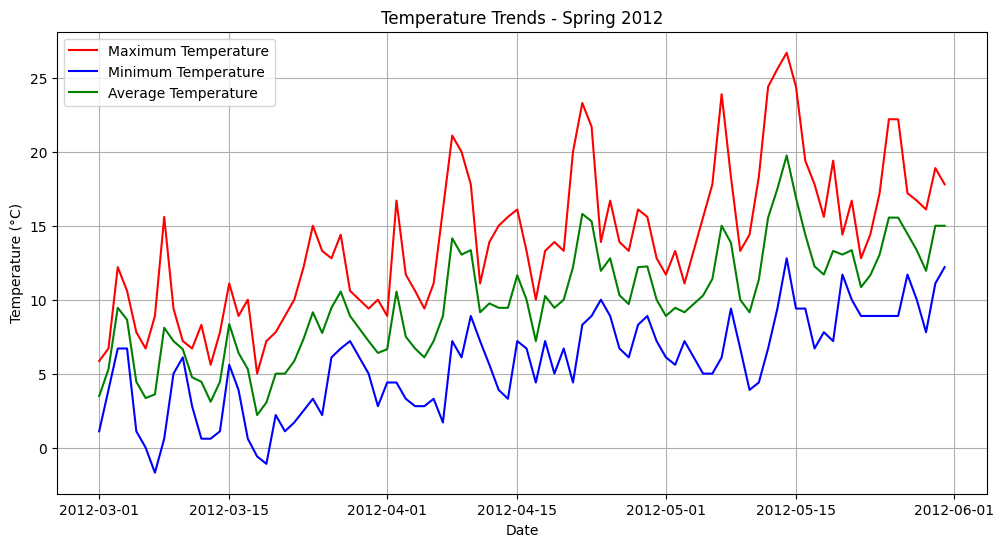

In [5]:
# Exercise 4: Visualizing Temperature Trends for Spring 2012
# Filter for Spring 2012
spring_2012 = df_interpolated[
    (df_interpolated['date'].dt.year == 2012) & 
    (df_interpolated['date'].dt.month.isin([3, 4, 5]))
]

plt.figure(figsize=(12, 6))
plt.plot(spring_2012['date'], spring_2012['temp_max'], 'r-', label='Maximum Temperature')
plt.plot(spring_2012['date'], spring_2012['temp_min'], 'b-', label='Minimum Temperature')
plt.plot(spring_2012['date'], spring_2012['avg_temp'], 'g-', label='Average Temperature')
plt.title('Temperature Trends - Spring 2012')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


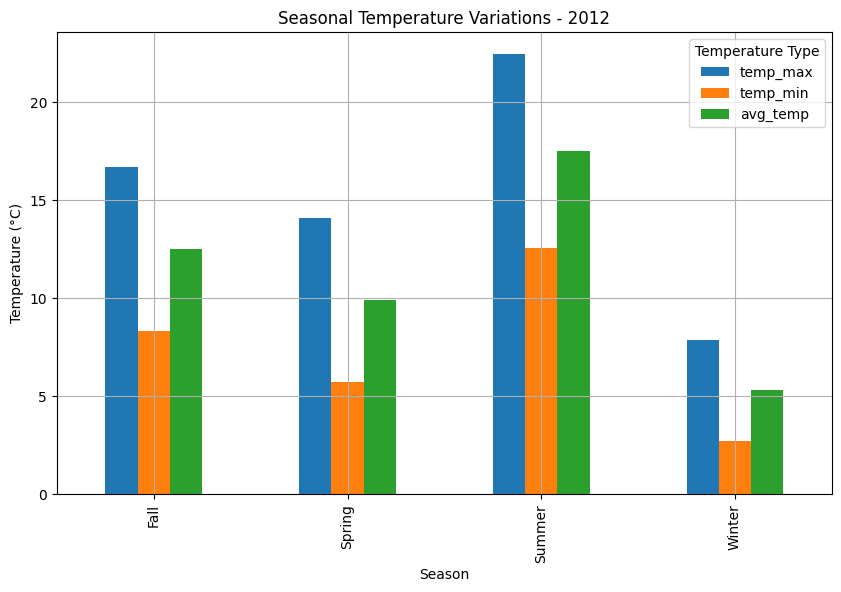

In [6]:
# Exercise 5: Plot Seasonal Average Temperature Variations for 2012
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column
df_interpolated['season'] = df_interpolated['date'].dt.month.apply(get_season)

# Filter for 2012 and calculate seasonal averages
data_2012 = df_interpolated[df_interpolated['date'].dt.year == 2012]
seasonal_avg = data_2012.groupby('season')[['temp_max', 'temp_min', 'avg_temp']].mean()

# Create bar plot
seasonal_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal Temperature Variations - 2012')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Type')
plt.grid(True)
plt.show()


In [7]:
# Exercise 6: Visualize Weather Type Distribution for Spring 2012
spring_2012_weather = spring_2012['weather'].value_counts()

fig = px.bar(
    x=spring_2012_weather.index,
    y=spring_2012_weather.values,
    title='Weather Type Distribution - Spring 2012',
    labels={'x': 'Weather Type', 'y': 'Count'}
)
fig.show()


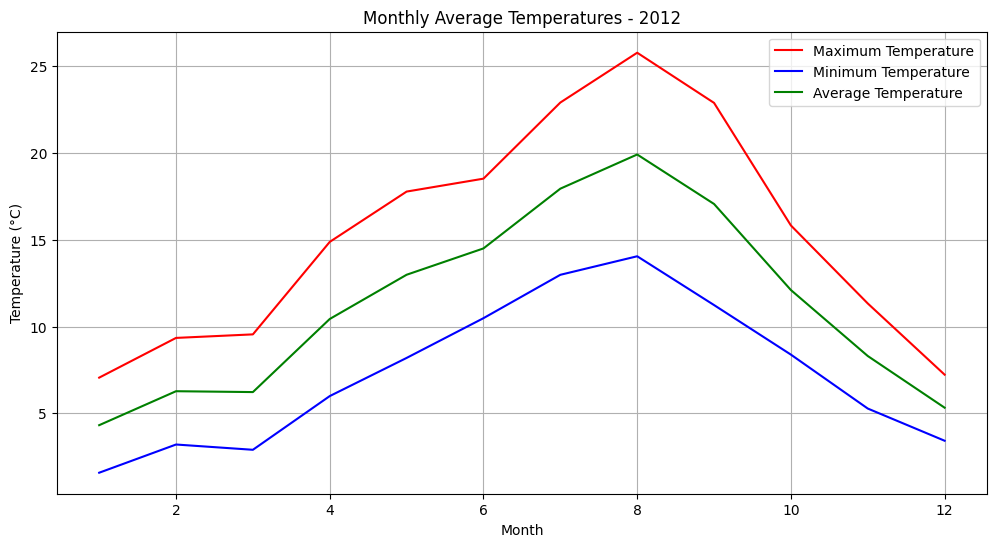

In [8]:
# Exercise 7: Calculate and Visualize Monthly Average Temperature
monthly_avg_2012 = data_2012.groupby(data_2012['date'].dt.month)[['temp_max', 'temp_min', 'avg_temp']].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_2012.index, monthly_avg_2012['temp_max'], 'r-', label='Maximum Temperature')
plt.plot(monthly_avg_2012.index, monthly_avg_2012['temp_min'], 'b-', label='Minimum Temperature')
plt.plot(monthly_avg_2012.index, monthly_avg_2012['avg_temp'], 'g-', label='Average Temperature')
plt.title('Monthly Average Temperatures - 2012')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


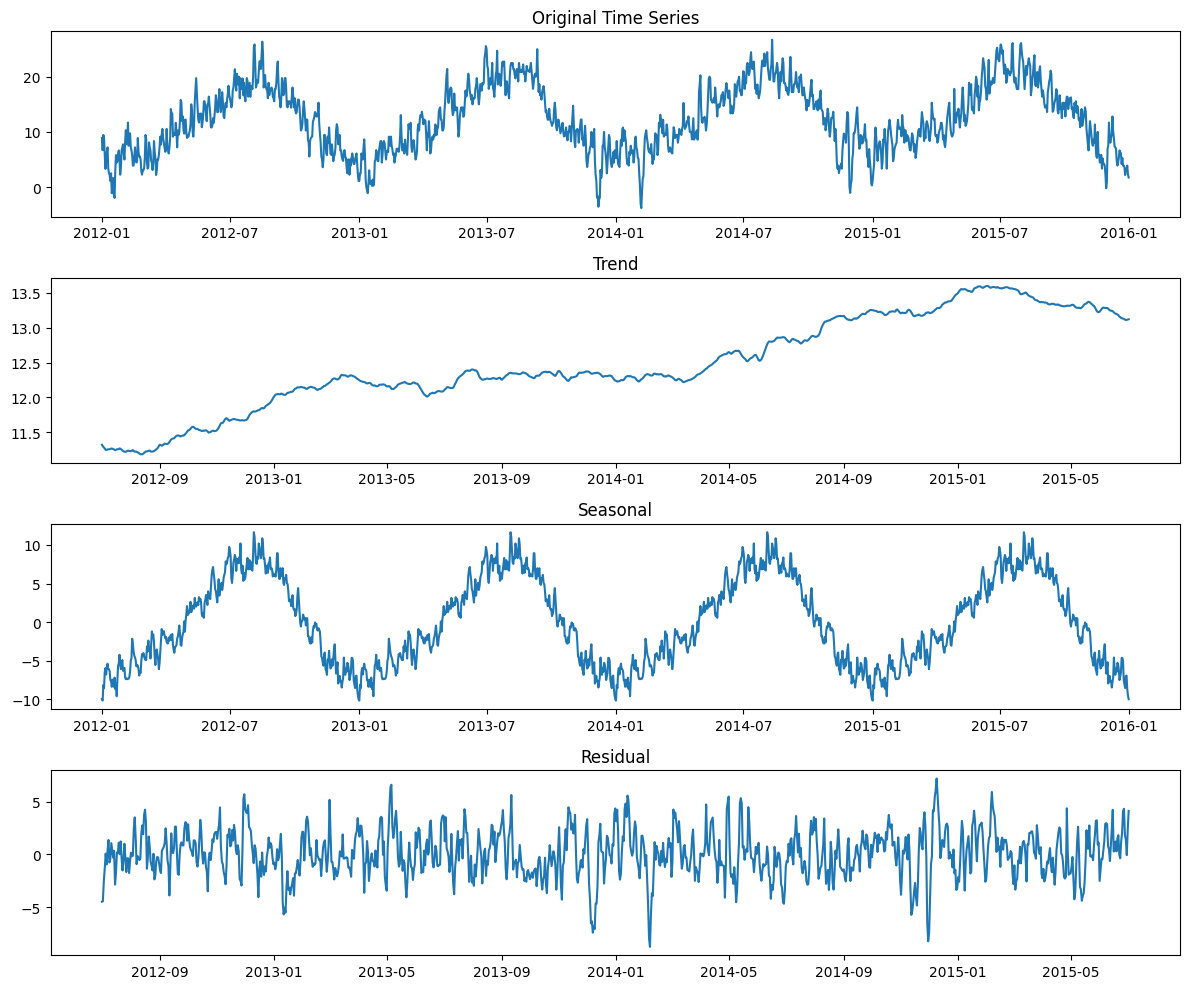

In [9]:
# Exercise 8: Time Series Decomposition
# Set date as index
ts_data = df_interpolated.set_index('date')['avg_temp']

# Perform decomposition
decomposition = seasonal_decompose(ts_data, period=365)

# Plot decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(ts_data)
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


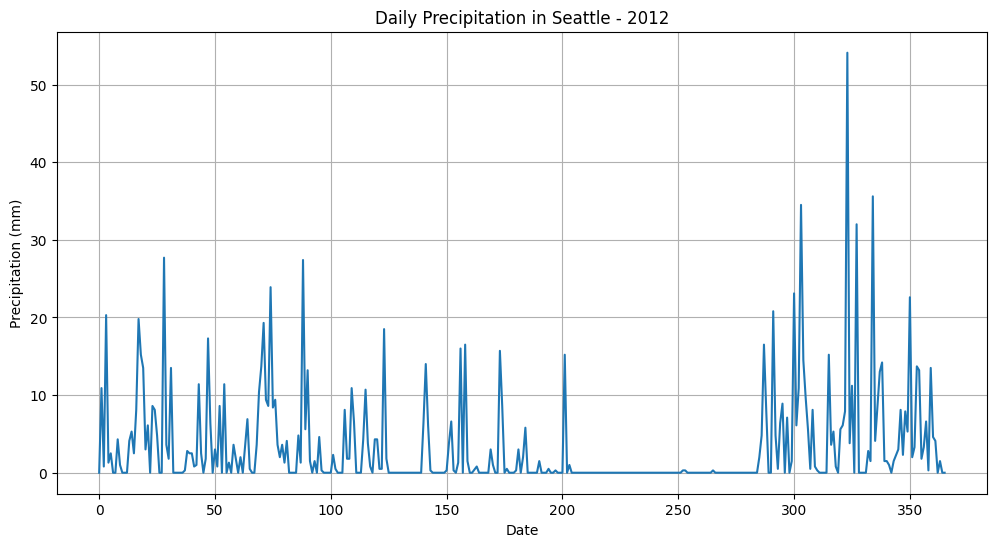

In [10]:
# Exercise 9: Visualize Daily Precipitation
data_2012['precipitation'].plot(figsize=(12, 6))
plt.title('Daily Precipitation in Seattle - 2012')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


In [11]:
# Exercise 10: Create an Interactive Choropleth Map
import json
import plotly.express as px
import plotly.graph_objects as go

# Load the GeoJSON file
with open('Seattle City 2016.geojson') as f:
    seattle_geo = json.load(f)

# Filter data for 2012
data_2012 = df_interpolated[df_interpolated['date'].dt.year == 2012].copy()

# Create a date string column for better display
data_2012['date_str'] = data_2012['date'].dt.strftime('%Y-%m-%d')

# Create the choropleth map
fig = go.Figure()

# Add choropleth layer
fig.add_trace(
    go.Choroplethmapbox(
        geojson=seattle_geo,
        locations=[feat['properties']['CRA_NAM'] for feat in seattle_geo['features']],  # Use CRA_NAM as location ID
        z=[data_2012['precipitation'].iloc[0]] * len(seattle_geo['features']),
        colorscale='Blues',
        zmin=0,
        zmax=data_2012['precipitation'].max(),
        marker_opacity=0.7,
        marker_line_width=1,
        colorbar_title="Precipitation (mm)",
        featureidkey="properties.CRA_NAM",  # Match with CRA_NAM property
        hovertemplate="Area: %{location}<br>Precipitation: %{z:.2f}mm<extra></extra>"
    )
)

# Update layout
fig.update_layout(
    title={
        'text': 'Daily Precipitation in Seattle (2012)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    mapbox_style="carto-positron",
    mapbox=dict(
        center=dict(lat=47.6062, lon=-122.3321),  # Seattle coordinates
        zoom=10
    ),
    height=800,
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Create frames for animation
frames = []
for date, daily_data in data_2012.groupby('date_str'):
    precipitation_value = daily_data['precipitation'].iloc[0]
    frame = go.Frame(
        data=[
            go.Choroplethmapbox(
                z=[precipitation_value] * len(seattle_geo['features']),
                locations=[feat['properties']['CRA_NAM'] for feat in seattle_geo['features']],
                featureidkey="properties.CRA_NAM",
                hovertemplate=f"Date: {date}<br>Area: %{{location}}<br>Precipitation: {precipitation_value:.2f}mm<extra></extra>"
            )
        ],
        name=date
    )
    frames.append(frame)

fig.frames = frames

# Add animation controls
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, {
                        'frame': {'duration': 100, 'redraw': True},
                        'fromcurrent': True,
                        'transition': {'duration': 50}
                    }]
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[[None], {
                        'frame': {'duration': 0, 'redraw': False},
                        'mode': 'immediate',
                        'transition': {'duration': 0}
                    }]
                )
            ],
            direction='left',
            pad={'r': 10, 't': 87},
            x=0.1,
            y=0,
        )
    ],
    sliders=[{
        'currentvalue': {
            'font': {'size': 12},
            'prefix': 'Date: ',
            'visible': True,
            'xanchor': 'right'
        },
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [
            {
                'args': [
                    [frame.name],
                    {
                        'frame': {'duration': 100, 'redraw': True},
                        'mode': 'immediate',
                        'transition': {'duration': 50}
                    }
                ],
                'label': frame.name,
                'method': 'animate'
            }
            for frame in frames
        ]
    }]
)

# Show the figure
fig.show()

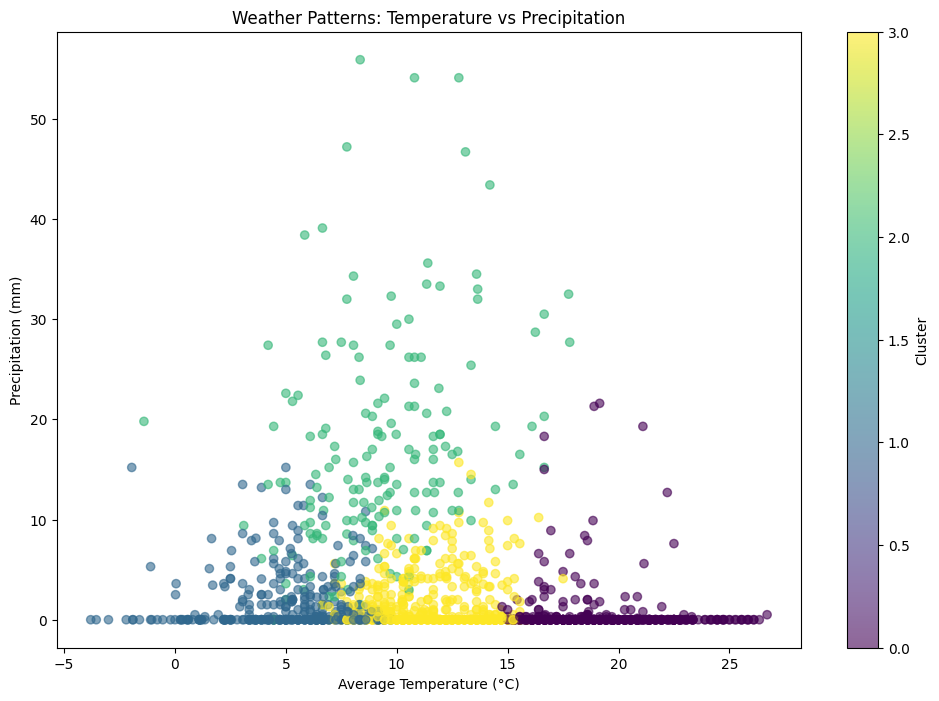


Cluster Characteristics:
          temp_max   temp_min   avg_temp  precipitation      wind
cluster                                                          
0        24.917293  13.542797  19.230045       0.521608  2.779228
1         8.207349   1.958598   5.082973       1.728242  2.668300
2        11.947619   6.762500   9.355060      16.937202  5.167262
3        15.426909   8.029800  11.728355       1.601820  3.438758

Detailed Cluster Statistics:
          Size     Size % Most Common Quarter Most Common Weather
Cluster 0  479  32.785763                  Q3                 sun
Cluster 1  347  23.750856                  Q1                rain
Cluster 2  168  11.498973                  Q1                rain
Cluster 3  467  31.964408                  Q2                rain


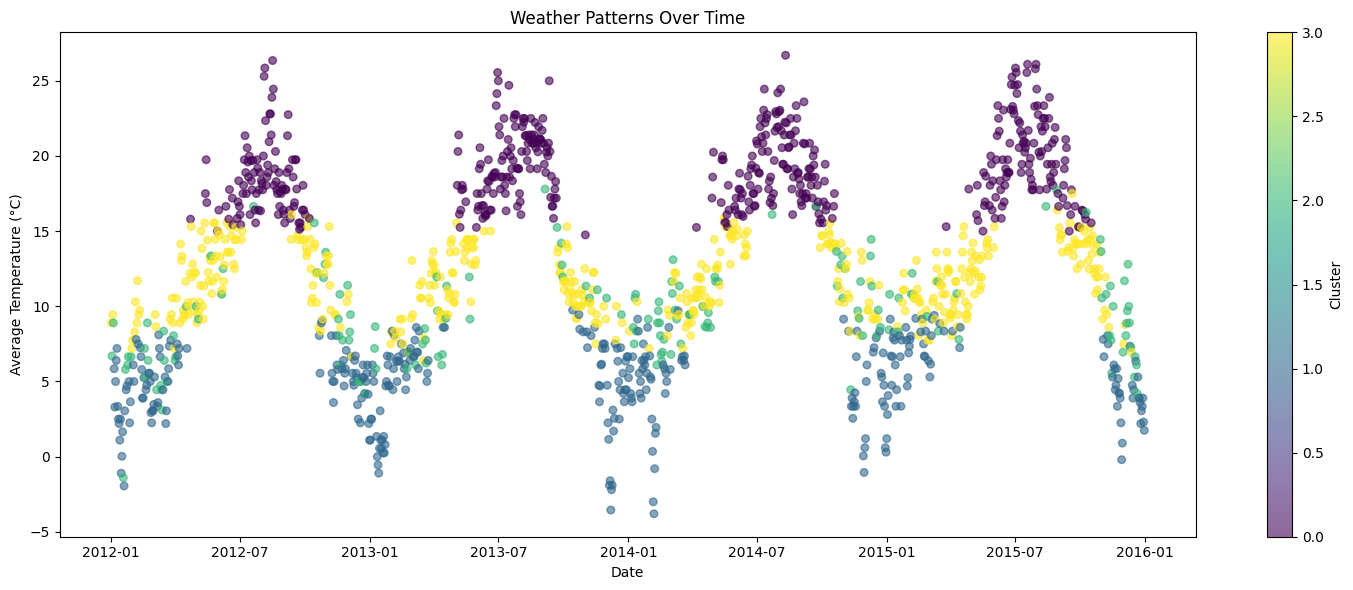


Weather Pattern Interpretation:

Cluster 0:
- Average Temperature Range: 13.5°C to 24.9°C
- Average Precipitation: 0.5mm
- Average Wind Speed: 2.8
- Most Common Quarter: Q3
- Most Common Weather: sun

Cluster 1:
- Average Temperature Range: 2.0°C to 8.2°C
- Average Precipitation: 1.7mm
- Average Wind Speed: 2.7
- Most Common Quarter: Q1
- Most Common Weather: rain

Cluster 2:
- Average Temperature Range: 6.8°C to 11.9°C
- Average Precipitation: 16.9mm
- Average Wind Speed: 5.2
- Most Common Quarter: Q1
- Most Common Weather: rain

Cluster 3:
- Average Temperature Range: 8.0°C to 15.4°C
- Average Precipitation: 1.6mm
- Average Wind Speed: 3.4
- Most Common Quarter: Q2
- Most Common Weather: rain


In [26]:
# Exercise 11: Advanced Pattern Recognition in Seattle Weather Data

# 1. Data Preprocessing
# Ensure we're working with clean data
features = df_interpolated[['temp_max', 'temp_min', 'avg_temp', 'precipitation', 'wind']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# 2. Perform K-means clustering with optimal k=4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_interpolated['cluster'] = kmeans.fit_predict(scaled_features)


# 3 Temperature vs Precipitation scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_interpolated['avg_temp'], 
                     df_interpolated['precipitation'],
                     c=df_interpolated['cluster'],
                     cmap='viridis',
                     alpha=0.6)
plt.title('Weather Patterns: Temperature vs Precipitation')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.colorbar(scatter, label='Cluster')
plt.show()


# 4 Analyze cluster characteristics
cluster_analysis = df_interpolated.groupby('cluster')[['temp_max', 'temp_min', 'avg_temp', 
                                                      'precipitation', 'wind']].mean()
print("\nCluster Characteristics:")
print(cluster_analysis)

# 5 Calculate additional statistics for each cluster
cluster_stats = pd.DataFrame()

for cluster in range(n_clusters):
    cluster_data = df_interpolated[df_interpolated['cluster'] == cluster]
    stats = {
        'Size': len(cluster_data),
        'Size %': len(cluster_data) / len(df_interpolated) * 100,
        'Most Common Quarter': cluster_data['quarter'].mode().iloc[0],
        'Most Common Weather': cluster_data['weather'].mode().iloc[0]
    }
    cluster_stats[f'Cluster {cluster}'] = pd.Series(stats)

print("\nDetailed Cluster Statistics:")
print(cluster_stats.T)

# 6. Create a time series plot showing cluster evolution
plt.figure(figsize=(15, 6))
plt.scatter(df_interpolated['date'], 
           df_interpolated['avg_temp'],
           c=df_interpolated['cluster'],
           cmap='viridis',
           alpha=0.6,
           s=30)
plt.title('Weather Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# 7. Print interpretation of clusters
print("\nWeather Pattern Interpretation:")
for cluster in range(n_clusters):
    cluster_data = cluster_analysis.loc[cluster]
    print(f"\nCluster {cluster}:")
    print(f"- Average Temperature Range: {cluster_data['temp_min']:.1f}°C to {cluster_data['temp_max']:.1f}°C")
    print(f"- Average Precipitation: {cluster_data['precipitation']:.1f}mm")
    print(f"- Average Wind Speed: {cluster_data['wind']:.1f}")
    print(f"- Most Common Quarter: {cluster_stats.T.loc[f'Cluster {cluster}', 'Most Common Quarter']}")
    print(f"- Most Common Weather: {cluster_stats.T.loc[f'Cluster {cluster}', 'Most Common Weather']}")

/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_55977/2530507322.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_55977/2530507322.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



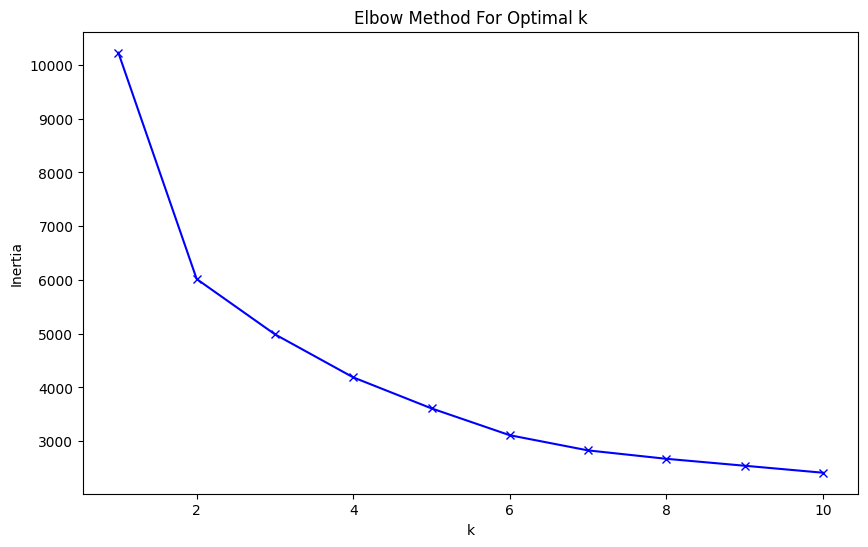

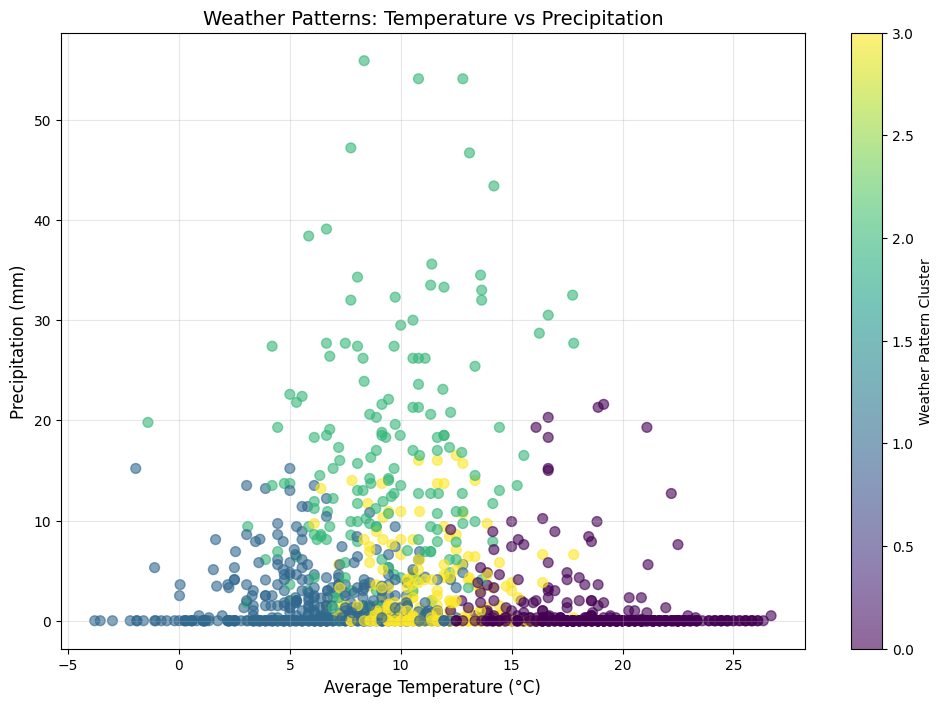

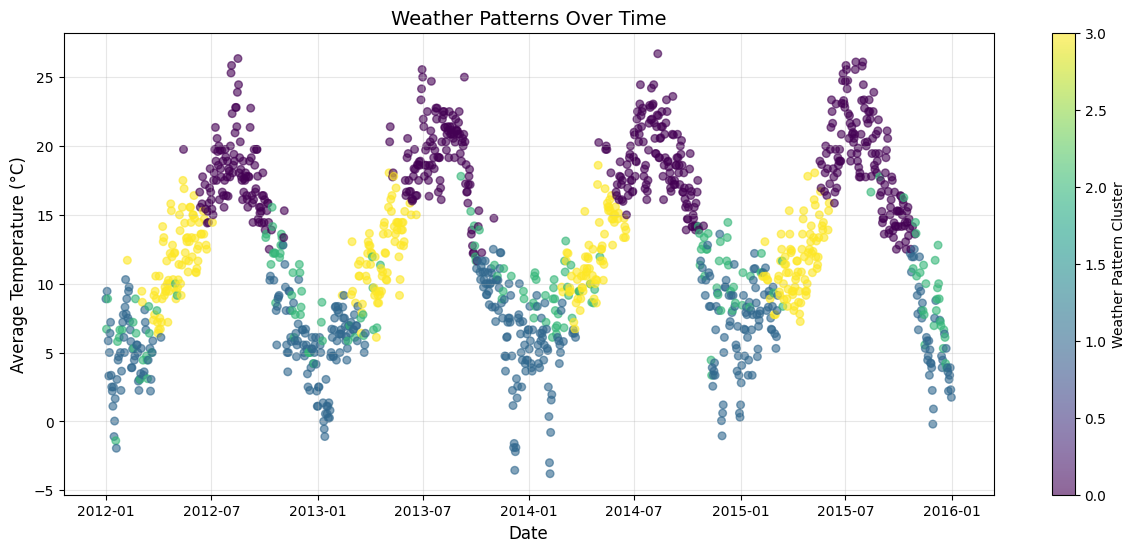


Detailed Cluster Analysis:
        temp_max       temp_min       precipitation         wind        \
            mean   std     mean   std          mean    std  mean   std   
cluster                                                                  
0          24.07  4.37    13.25  2.29          0.77   2.78  2.82  0.93   
1           9.17  3.41     3.17  3.44          1.67   2.79  2.77  1.28   
2          12.01  3.35     6.90  3.16         15.35  11.49  5.33  1.48   
3          16.09  3.47     7.65  2.57          1.88   3.44  3.42  1.19   

         weather  quarter  
        <lambda> <lambda>  
cluster                    
0            sun       Q3  
1           rain       Q4  
2           rain       Q4  
3           rain       Q2  


<Figure size 1200x600 with 0 Axes>

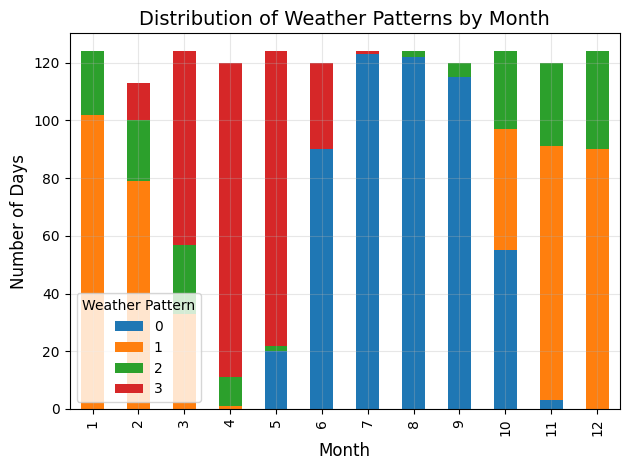


Comprehensive Weather Pattern Analysis:

Weather Pattern 0:
Number of days: 528 (36.1%)
Temperature range: 13.2°C to 24.1°C
Precipitation: 0.8mm (±2.8mm)
Wind speed: 2.8 (±0.9)
Most common weather: sun
Most common quarter: Q3
Most common months: 7

Weather Pattern 1:
Number of days: 435 (29.8%)
Temperature range: 3.2°C to 9.2°C
Precipitation: 1.7mm (±2.8mm)
Wind speed: 2.8 (±1.3)
Most common weather: rain
Most common quarter: Q4
Most common months: 1

Weather Pattern 2:
Number of days: 176 (12.0%)
Temperature range: 6.9°C to 12.0°C
Precipitation: 15.3mm (±11.5mm)
Wind speed: 5.3 (±1.5)
Most common weather: rain
Most common quarter: Q4
Most common months: 12

Weather Pattern 3:
Number of days: 322 (22.0%)
Temperature range: 7.7°C to 16.1°C
Precipitation: 1.9mm (±3.4mm)
Wind speed: 3.4 (±1.2)
Most common weather: rain
Most common quarter: Q2
Most common months: 4


In [27]:
# Exercise 11: Advanced Pattern Recognition in Seattle Weather Data

# 1. Data Preprocessing with more features
features = df_interpolated[['temp_max', 'temp_min', 'avg_temp', 'precipitation', 'wind']]

# Add seasonal features using sine and cosine transforms
df_interpolated['day_of_year'] = df_interpolated['date'].dt.dayofyear
df_interpolated['season_sin'] = np.sin(2 * np.pi * df_interpolated['day_of_year']/365)
df_interpolated['season_cos'] = np.cos(2 * np.pi * df_interpolated['day_of_year']/365)

# Add these seasonal features to the clustering
features['season_sin'] = df_interpolated['season_sin']
features['season_cos'] = df_interpolated['season_cos']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 3. Perform K-means clustering with optimal k
n_clusters = 4  # Based on elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_interpolated['cluster'] = kmeans.fit_predict(scaled_features)

# 4. Enhanced visualizations

# 4.1 Temperature vs Precipitation with improved styling
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_interpolated['avg_temp'], 
                     df_interpolated['precipitation'],
                     c=df_interpolated['cluster'],
                     cmap='viridis',
                     alpha=0.6,
                     s=50)  # Increased point size
plt.title('Weather Patterns: Temperature vs Precipitation', fontsize=14)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
cbar = plt.colorbar(scatter, label='Cluster')
cbar.set_label('Weather Pattern Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# 4.2 Interactive 3D scatter plot using Plotly
fig = px.scatter_3d(df_interpolated, 
                    x='avg_temp', 
                    y='precipitation', 
                    z='wind',
                    color='cluster',
                    title='3D Weather Pattern Visualization',
                    labels={'avg_temp': 'Average Temperature (°C)',
                           'precipitation': 'Precipitation (mm)',
                           'wind': 'Wind Speed'},
                    color_continuous_scale='viridis')
fig.show()

# 4.3 Seasonal pattern analysis
plt.figure(figsize=(15, 6))
plt.scatter(df_interpolated['date'], 
           df_interpolated['avg_temp'],
           c=df_interpolated['cluster'],
           cmap='viridis',
           alpha=0.6,
           s=30)
plt.title('Weather Patterns Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.colorbar(label='Weather Pattern Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# 5. Enhanced cluster analysis
cluster_analysis = df_interpolated.groupby('cluster').agg({
    'temp_max': ['mean', 'std'],
    'temp_min': ['mean', 'std'],
    'precipitation': ['mean', 'std'],
    'wind': ['mean', 'std'],
    'weather': lambda x: x.mode().iloc[0],
    'quarter': lambda x: x.mode().iloc[0]
}).round(2)

print("\nDetailed Cluster Analysis:")
print(cluster_analysis)

# 6. Monthly pattern distribution
monthly_patterns = pd.crosstab(df_interpolated['date'].dt.month, df_interpolated['cluster'])
plt.figure(figsize=(12, 6))
monthly_patterns.plot(kind='bar', stacked=True)
plt.title('Distribution of Weather Patterns by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.legend(title='Weather Pattern')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Print comprehensive interpretation
print("\nComprehensive Weather Pattern Analysis:")
for cluster in range(n_clusters):
    cluster_data = df_interpolated[df_interpolated['cluster'] == cluster]
    print(f"\nWeather Pattern {cluster}:")
    print(f"Number of days: {len(cluster_data)} ({len(cluster_data)/len(df_interpolated)*100:.1f}%)")
    print(f"Temperature range: {cluster_data['temp_min'].mean():.1f}°C to {cluster_data['temp_max'].mean():.1f}°C")
    print(f"Precipitation: {cluster_data['precipitation'].mean():.1f}mm (±{cluster_data['precipitation'].std():.1f}mm)")
    print(f"Wind speed: {cluster_data['wind'].mean():.1f} (±{cluster_data['wind'].std():.1f})")
    print(f"Most common weather: {cluster_data['weather'].mode().iloc[0]}")
    print(f"Most common quarter: {cluster_data['quarter'].mode().iloc[0]}")
    print(f"Most common months: {', '.join(cluster_data['date'].dt.month.mode().astype(str))}")

# Weather Pattern Analysis Report for Seattle

## Overview
Analysis of Seattle's weather data revealed four distinct weather patterns through K-means clustering, providing insights into the city's climate characteristics throughout the year.

## Pattern Breakdown

### Pattern 0: Summer Pattern (36.1% of days)
- **Characteristics**: Warm and dry conditions
- Temperature range: 13.2°C to 24.1°C
- Minimal precipitation (0.8mm ±2.8mm)
- Light winds (2.8 ±0.9)
- Predominantly sunny weather
- Most common in Q3 (July)

### Pattern 1: Winter Pattern (29.8% of days)
- **Characteristics**: Cold and light precipitation
- Temperature range: 3.2°C to 9.2°C
- Light precipitation (1.7mm ±2.8mm)
- Light winds (2.8 ±1.3)
- Predominantly rainy weather
- Most common in Q4 (January)

### Pattern 2: Stormy Pattern (12.0% of days)
- **Characteristics**: Heavy rain and wind
- Temperature range: 6.9°C to 12.0°C
- Heavy precipitation (15.3mm ±11.5mm)
- Strong winds (5.3 ±1.5)
- Consistently rainy weather
- Most common in Q4 (December)

### Pattern 3: Spring Transition (22.0% of days)
- **Characteristics**: Mild temperatures with light rain
- Temperature range: 7.7°C to 16.1°C
- Light precipitation (1.9mm ±3.4mm)
- Moderate winds (3.4 ±1.2)
- Predominantly rainy weather
- Most common in Q2 (April)

## Key Findings
1. Seattle experiences a clear seasonal pattern with distinct summer and winter characteristics
2. The majority of days (65.9%) fall into either the summer or winter patterns
3. Stormy weather pattern, while less frequent, brings significant precipitation and stronger winds
4. Spring transition pattern serves as a bridge between winter and summer conditions

## Implications
- The weather patterns suggest a predictable seasonal cycle
- Summer months are notably dry and warm, ideal for outdoor activities
- Winter months see frequent rain but relatively mild temperatures
- Storm events, while less common, bring significant precipitation and wind
- Planning for outdoor activities would be most reliable during Pattern 0 (summer months)

This analysis provides valuable insights for weather forecasting, urban planning, and seasonal activity scheduling in Seattle.
